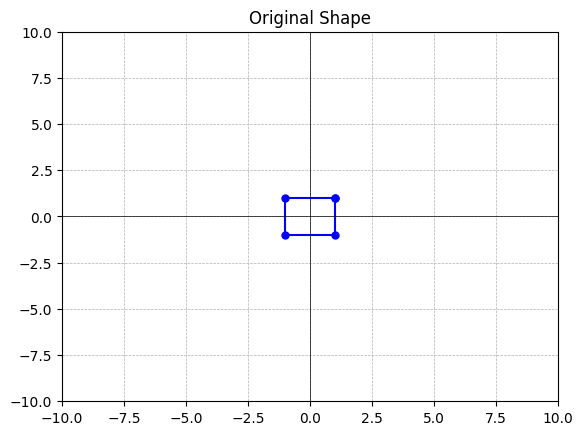

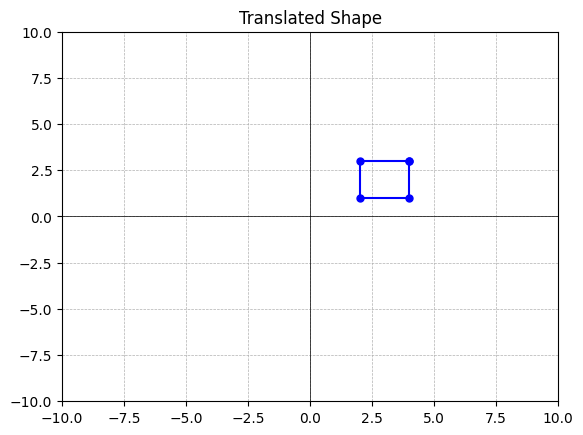

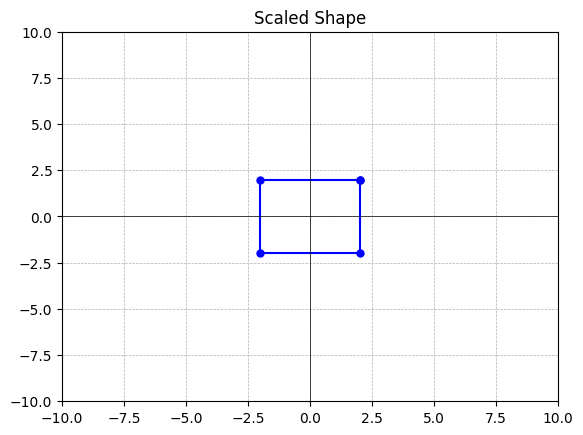

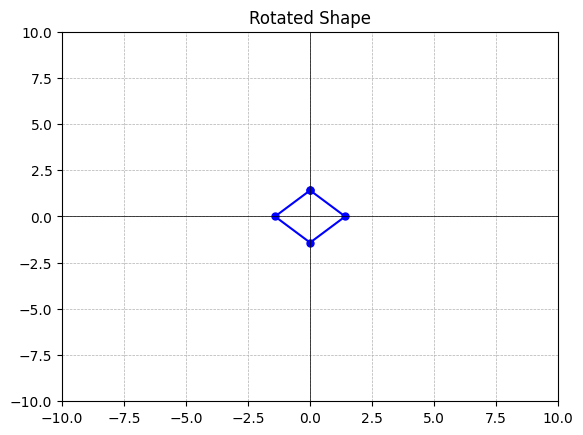

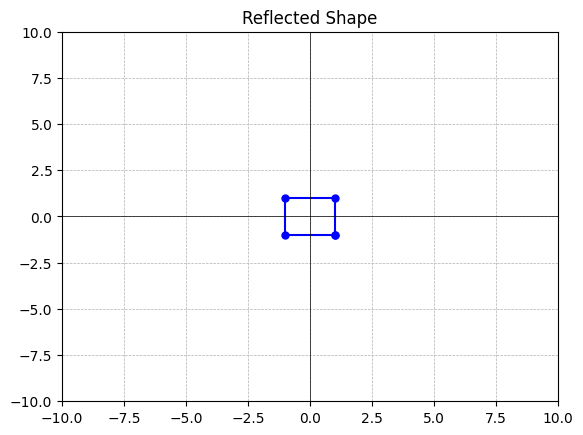

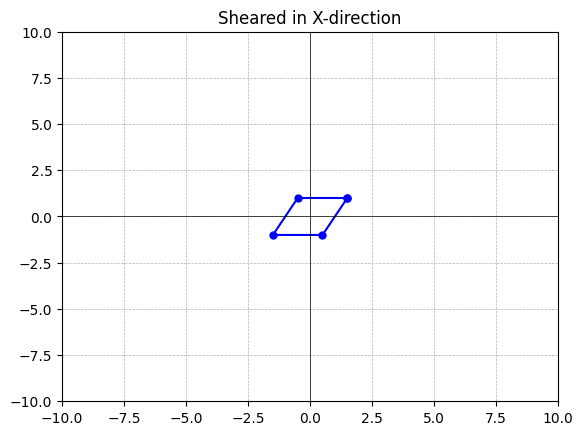

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def plot_polygon(points, title="Polygon"):
    points = np.vstack([points, points[0]])
    plt.plot(points[:, 0], points[:, 1], 'bo-', markersize=5)
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.title(title)
    plt.show()

def transform(points, matrix):
    return np.dot(points, matrix.T)

# Define a square centered at origin
square = np.array([[1, 1], [-1, 1], [-1, -1], [1, -1]])
plot_polygon(square, "Original Shape")

# 1. Translation
translation_vector = np.array([3, 2])
translated_square = square + translation_vector
plot_polygon(translated_square, "Translated Shape")

# 2. Scaling
scaling_matrix = np.array([[2, 0], [0, 2]])
scaled_square = transform(square, scaling_matrix)
plot_polygon(scaled_square, "Scaled Shape")

# 3. Rotation (45 degrees)
theta = np.radians(45)
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
rotated_square = transform(square, rotation_matrix)
plot_polygon(rotated_square, "Rotated Shape")

# 4. Reflection over x-axis
reflection_matrix = np.array([[1, 0], [0, -1]])
reflected_square = transform(square, reflection_matrix)
plot_polygon(reflected_square, "Reflected Shape")

# 5. Shearing in x-direction
shear_matrix_x = np.array([[1, 0.5], [0, 1]])
sheared_square_x = transform(square, shear_matrix_x)
plot_polygon(sheared_square_x, "Sheared in X-direction")

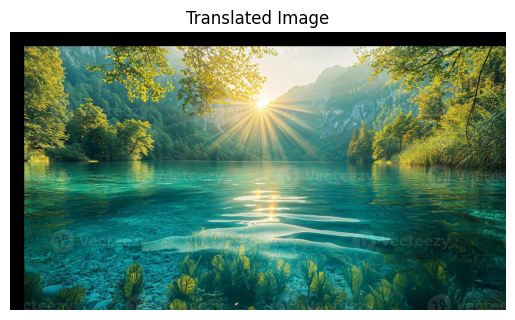

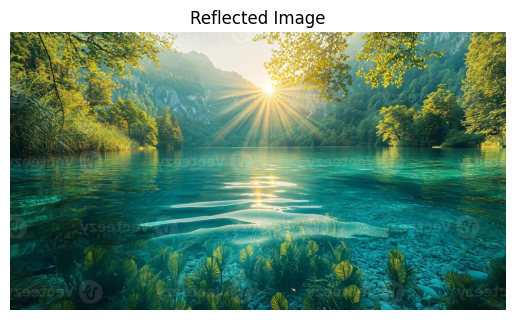

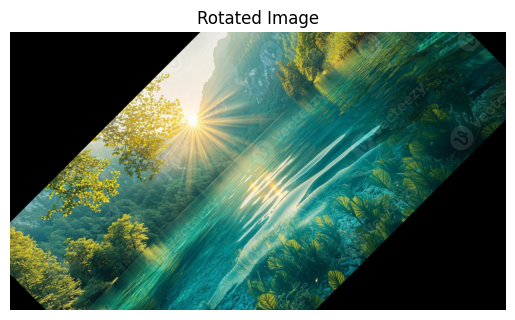

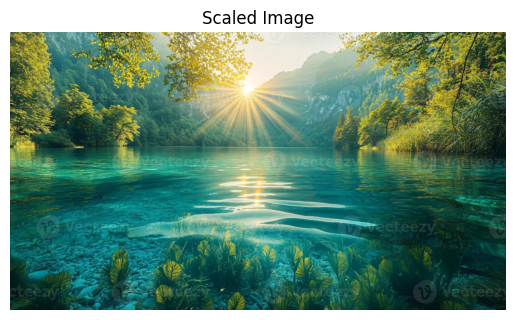

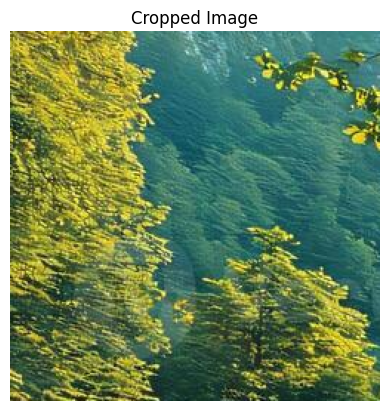

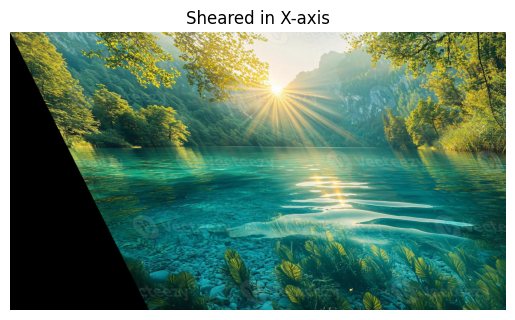

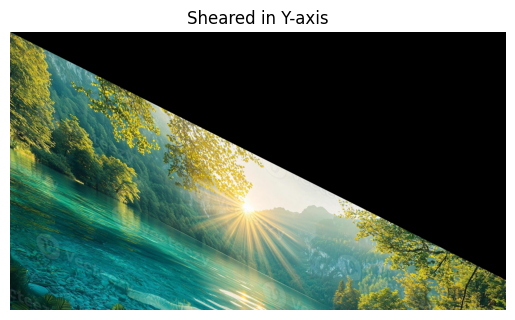

In [4]:
# ------------------- IMAGE TRANSFORMATIONS USING OPENCV ------------------- #

def display_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load image
img = cv2.imread('test.jpg')
if img is None:
    raise Exception("Image not found! Provide a valid path.")

# 1. Translation
h, w = img.shape[:2]
T = np.float32([[1, 0, 50], [0, 1, 50]])  # Shift by (50,50)
translated_img = cv2.warpAffine(img, T, (w, h))
display_image(translated_img, "Translated Image")

# 2. Reflection
reflected_img = cv2.flip(img, 1)
display_image(reflected_img, "Reflected Image")

# 3. Rotation (45 degrees)
M = cv2.getRotationMatrix2D((w//2, h//2), 45, 1)
rotated_img = cv2.warpAffine(img, M, (w, h))
display_image(rotated_img, "Rotated Image")

# 4. Scaling
scaled_img = cv2.resize(img, None, fx=1.5, fy=1.5)
display_image(scaled_img, "Scaled Image")

# 5. Cropping
cropped_img = img[50:300, 50:300]
display_image(cropped_img, "Cropped Image")

# 6. Shearing in x-axis
shear_matrix_x = np.float32([[1, 0.5, 0], [0, 1, 0]])
sheared_img_x = cv2.warpAffine(img, shear_matrix_x, (w, h))
display_image(sheared_img_x, "Sheared in X-axis")

# 7. Shearing in y-axis
shear_matrix_y = np.float32([[1, 0, 0], [0.5, 1, 0]])
sheared_img_y = cv2.warpAffine(img, shear_matrix_y, (w, h))
display_image(sheared_img_y, "Sheared in Y-axis")